In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-price-prediction/Housing.csv


# Welcome to this notebook for regression-modelling

Here we will be applying multiple-regression and simple-regression
and practically see why this models are not actually good for large dataset

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [145]:
data = pd.read_csv("/kaggle/input/housing-price-prediction/Housing.csv")

In [146]:
df = pd.read_csv("/kaggle/input/housing-price-prediction/Housing.csv")

In [147]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [148]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

there are no missing value which is a good thing,so we need to do is encode the categorical labels

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## Label encoding

In [150]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


In [151]:
df["basement"] = le.fit_transform(df["basement"])
df["guestroom"] = le.fit_transform(df["guestroom"])
df["mainroad"] = le.fit_transform(df["mainroad"])

df["hotwaterheating"] = le.fit_transform(df["hotwaterheating"])
df["airconditioning"] = le.fit_transform(df["airconditioning"])
df["prefarea"] = le.fit_transform(df["prefarea"])
df["furnishingstatus"] =le.fit_transform(df["furnishingstatus"])


In [152]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [153]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


<Axes: >

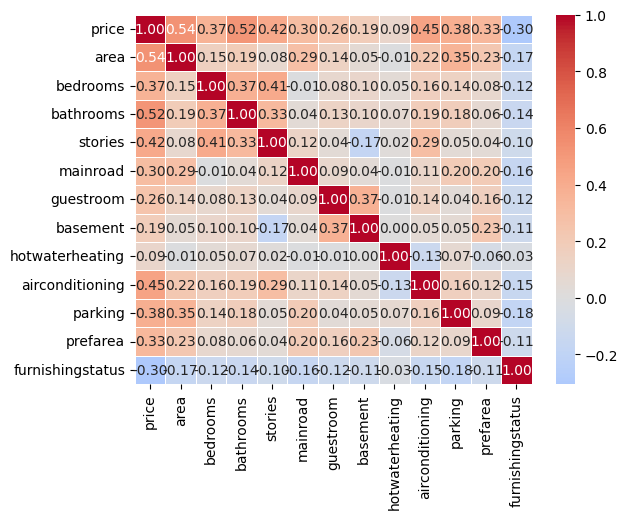

In [154]:
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=.5)

### Lets check whether there are outliers 

Text(0.5, 1.0, 'Original Data with Outliers')

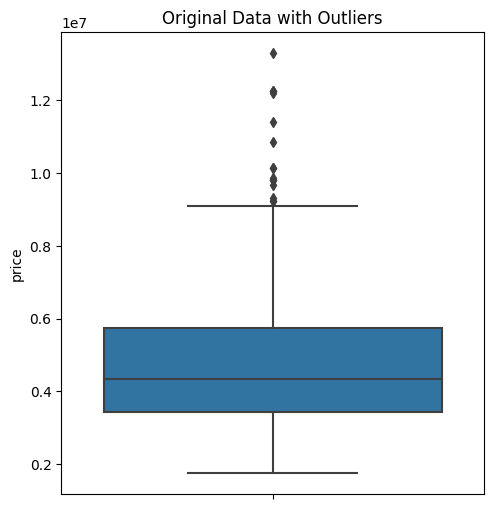

In [155]:

def remove_outliers_iqr(df, column):
    """Remove outliers using IQR method from specified column"""
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


# Visualize original data with outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='price')
plt.title('Original Data with Outliers')


## Removing the outliers through interquatile range method

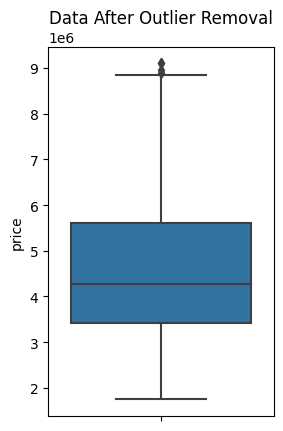

Original dataset size: 545
Cleaned dataset size: 530


In [156]:

# Remove outliers
cleaned_data = remove_outliers_iqr(df, 'price')

# Visualize cleaned data
plt.subplot(1, 2, 2)
sns.boxplot(data=cleaned_data, y='price')
plt.title('Data After Outlier Removal')
plt.show()

print(f"Original dataset size: {len(df)}")
print(f"Cleaned dataset size: {len(cleaned_data)}")


In [157]:
cleaned_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,2
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1


## Lets check whether the distribution is skewed?

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

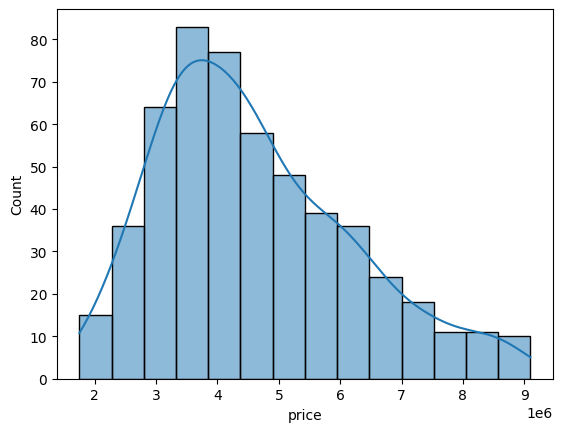

In [158]:
sns.histplot(cleaned_data["price"],kde=True)

### The distribtuion is right skewed ,we need to apply ***log transform***

## Apply log transformation on price column

we are apply log trasnform on the price column or target becuase the target is right skewed which can cause problem in the modelling of the problem

In [159]:

cleaned_data['price'] = np.log(cleaned_data['price'] + 1)  # Adding 1 to avoid log(0)


/tmp/ipykernel_35/25938002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['price'] = np.log(cleaned_data['price'] + 1)  # Adding 1 to avoid log(0)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

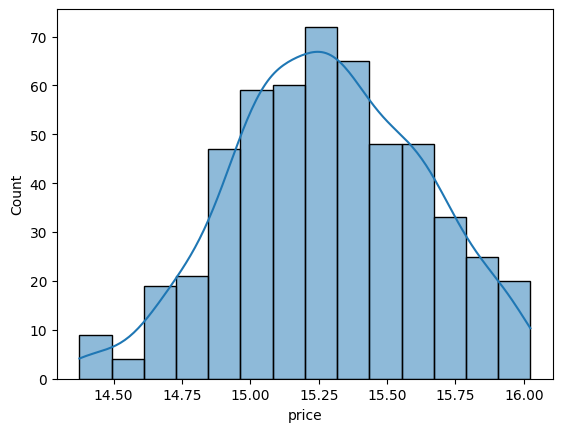

In [160]:
sns.histplot(cleaned_data["price"],kde=True)

## SPLIT THE DATA

In [162]:
X = cleaned_data.drop("price",axis=1)
y = cleaned_data["price"]

In [163]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,6000,4,1,2,1,0,1,0,0,2,0,1
16,6600,4,2,2,1,1,1,0,1,1,1,2
17,8500,3,2,4,1,0,0,0,1,2,0,0
18,4600,3,2,2,1,1,0,0,1,2,0,0
19,6420,3,2,2,1,0,0,0,1,1,1,1


## Standardize the area column

In [164]:
from sklearn.preprocessing import MinMaxScaler
z = MinMaxScaler()
X["area"] = z.fit_transform(X[["area"]].values)

In [165]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,0.311828,4,1,2,1,0,1,0,0,2,0,1
16,0.354839,4,2,2,1,1,1,0,1,1,1,2
17,0.491039,3,2,4,1,0,0,0,1,2,0,0
18,0.211470,3,2,2,1,1,0,0,1,2,0,0
19,0.341935,3,2,2,1,0,0,0,1,1,1,1


In [166]:
y

15     16.023785
16     16.023785
17     16.008281
18     16.000438
19     15.996493
         ...    
540    14.414348
541    14.384879
542    14.375127
543    14.375127
544    14.375127
Name: price, Length: 530, dtype: float64

## Splits

In [167]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [168]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
152,0.268817,5,1,2,1,1,1,0,1,0,1,0
286,0.081505,3,1,1,1,0,1,0,0,0,1,0
323,0.268817,3,1,1,1,0,0,0,0,3,0,1
38,0.311828,3,1,4,1,1,0,0,1,2,0,2
157,0.083656,4,2,2,0,1,1,0,0,1,0,0


In [169]:
X_test.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
150,0.249892,3,1,2,1,1,1,0,1,0,1,2
55,0.311828,3,1,2,1,0,0,0,1,1,0,2
317,0.239570,3,2,2,1,0,0,0,0,2,0,2
197,0.082437,3,2,2,0,0,1,0,1,1,0,1
381,0.168459,2,1,1,1,0,0,0,0,0,1,1


# Multiple Linear-Regression 

In [185]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [186]:
lass = Lasso(alpha = 0.5)

## Training the model

In [187]:
lr.fit(X_train,y_train)


LinearRegression()

In [188]:
X.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')

## Evaluation

In [191]:
from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE, r2_score as R2

y_pred = lr.predict(X_test)

mse = MSE(y_test, y_pred)
mae = MAE(y_test, y_pred)
r2 = R2(y_test, y_pred)

print(f"The MSE for the model is {mse} \n The MAE for the model is {mae} \n The R2 score for the model is {r2}\n")

The MSE for the model is 0.0387227074476804 
 The MAE for the model is 0.1578923490012507 
 The R2 score for the model is 0.7047655761983933



## Plotting the line

In [192]:
print("y shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)


y shape: (106,)
y_pred shape: (106,)


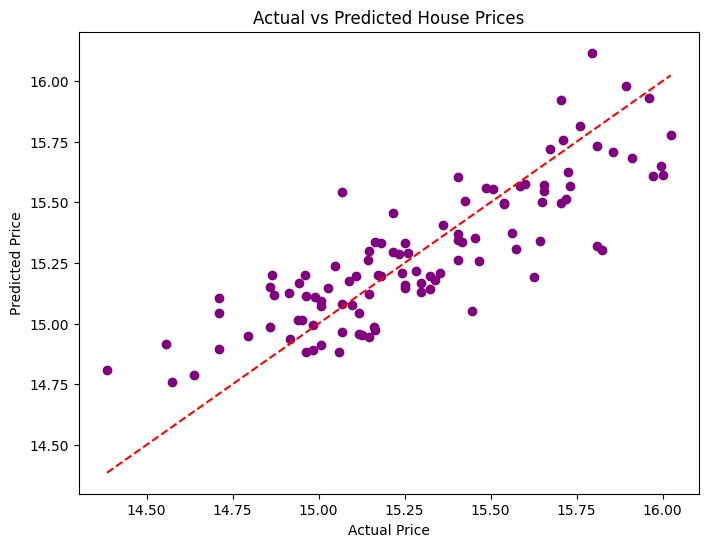

In [193]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='purple')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()


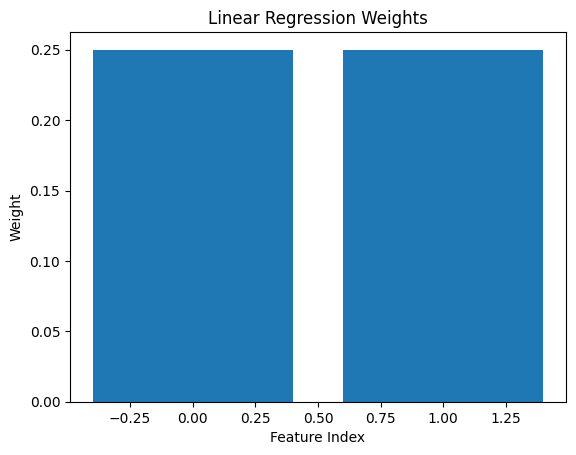

In [194]:
# Get weights (coefficients) and
weights = model.coef_
intercept = model.intercept_

# Plot the weights
plt.bar(range(len(weights)), weights)
plt.xlabel('Feature Index')
plt.ylabel('Weight')
plt.title('Linear Regression Weights')
plt.show()


# Simple Linear-Regression

In [196]:
cleaned_data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

Feature: area
  Coefficient (slope): 1.2521348943139856
  Intercept: 14.97481706338791
  MSE: 0.11
  MAE: 0.26
  R² Score: 0.1833
----------------------------------------
Feature: bedrooms
  Coefficient (slope): 0.14801723447976858
  Intercept: 14.845958306334344
  MSE: 0.11
  MAE: 0.28
  R² Score: 0.1583
----------------------------------------
Feature: bathrooms
  Coefficient (slope): 0.3061757101839392
  Intercept: 14.89104055431763
  MSE: 0.10
  MAE: 0.26
  R² Score: 0.2146
----------------------------------------
Feature: stories
  Coefficient (slope): 0.16419170704804312
  Intercept: 14.989878137353061
  MSE: 0.11
  MAE: 0.26
  R² Score: 0.1609
----------------------------------------
Feature: mainroad
  Coefficient (slope): 0.3156706287799037
  Intercept: 15.008536835456956
  MSE: 0.11
  MAE: 0.28
  R² Score: 0.1293
----------------------------------------
Feature: guestroom
  Coefficient (slope): 0.24390181786605303
  Intercept: 15.23524360173101
  MSE: 0.12
  MAE: 0.28
  R² Sc

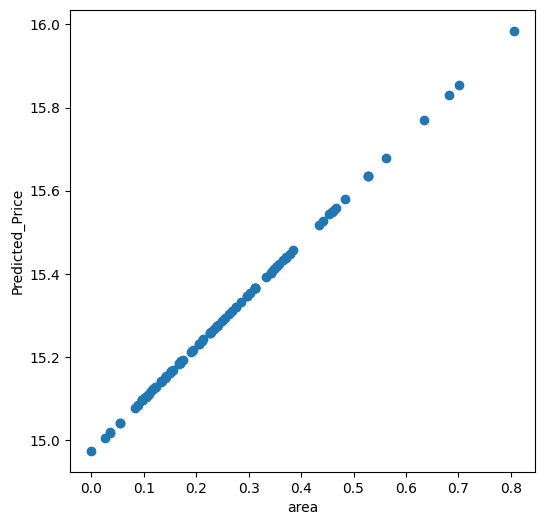

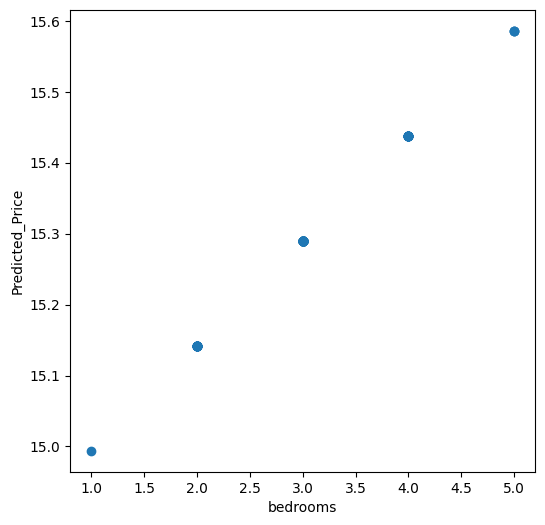

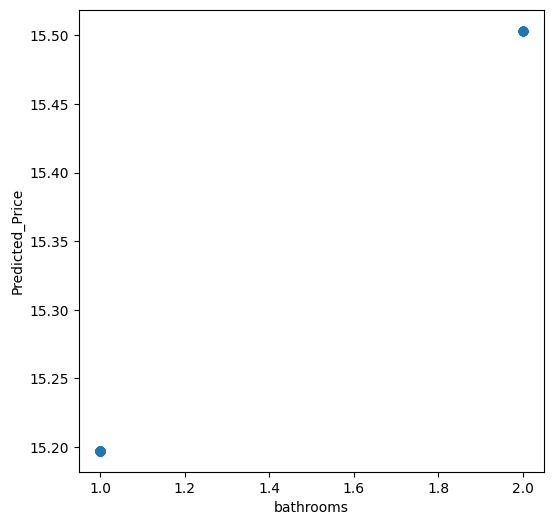

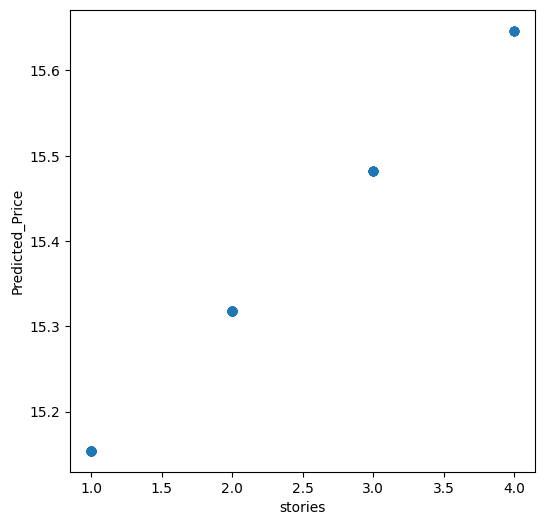

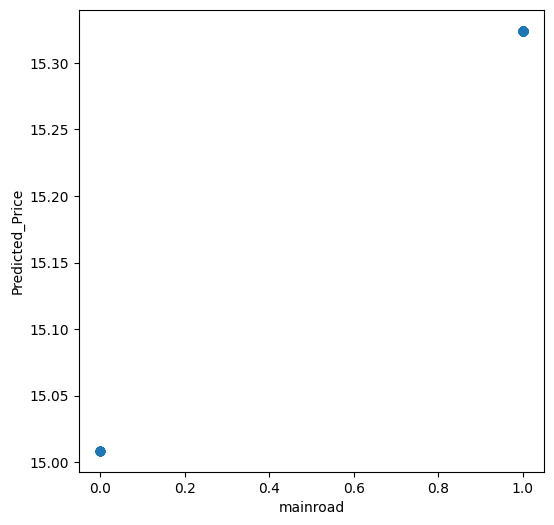

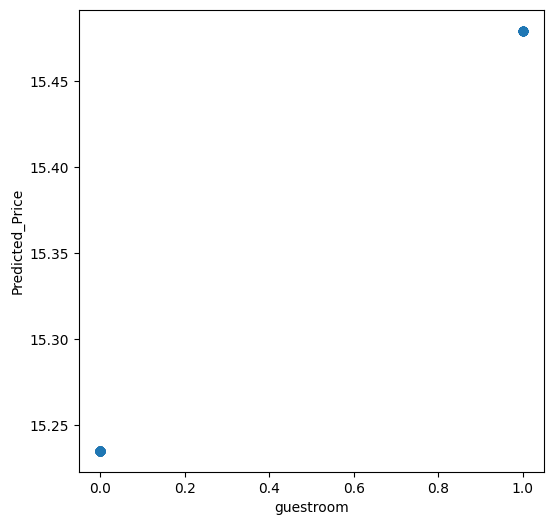

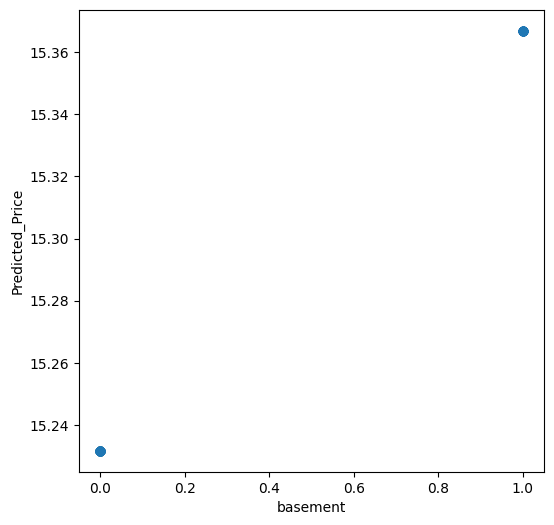

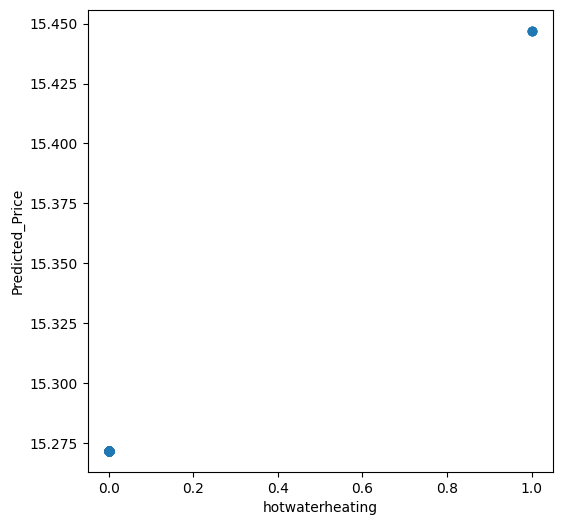

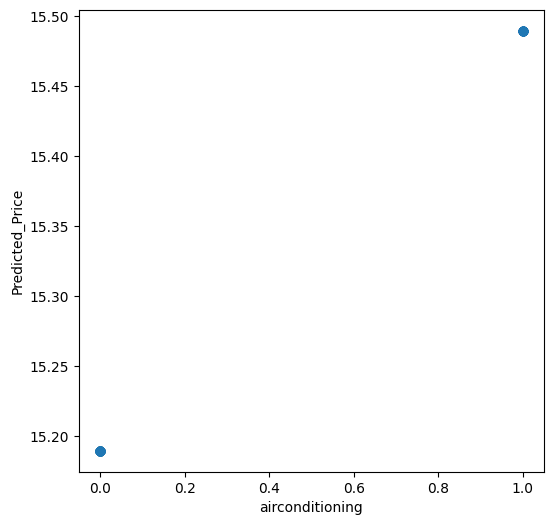

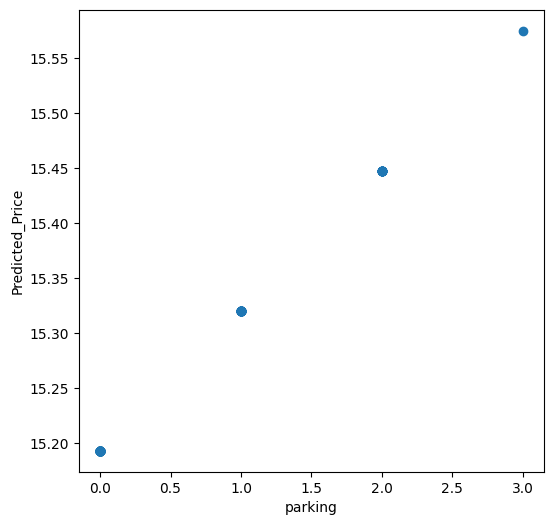

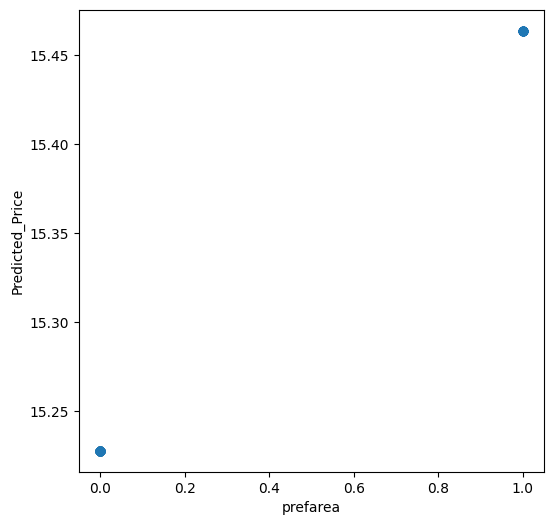

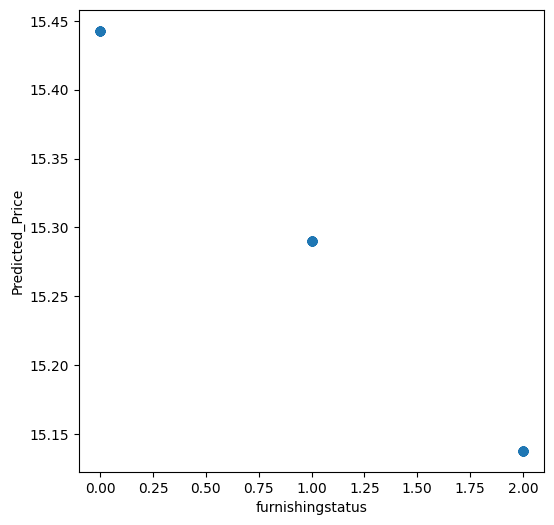

In [200]:
# List of individual features (make sure these match your actual dataset)
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 
            'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
            'parking', 'prefarea', 'furnishingstatus']

# Loop through each feature
for feature in features:
    # Select one feature as DataFrame (2D)
    X_train_single = X_train[[feature]]
    X_test_single = X_test[[feature]]

    # Train the model
    model = LinearRegression()
    model.fit(X_train_single, y_train)

    # Predict on test set
    y_pred = model.predict(X_test_single)

    # Calculate metrics
    mse = MSE(y_test, y_pred)
    mae = MAE(y_test, y_pred)
    r2 = R2(y_test, y_pred)

    # Output results
    print(f"Feature: {feature}")
    print(f"  Coefficient (slope): {model.coef_[0]}")
    print(f"  Intercept: {model.intercept_}")
    print(f"  MSE: {mse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  R² Score: {r2:.4f}")
    print("-" * 40)

    plt.figure(figsize=(6,6))
    plt.scatter(X_test_single,y_pred)
    plt.xlabel(feature)
    plt.ylabel("Predicted_Price")


# Conclusion
****Since the model is simple linear regression,it won't perform well beyond a threshold.
If we want to improve the performance ,we have to use powerful model like RandomForestRegressor****